[예제 9_1] CNN_Example_9_1

1 conv / 1 flatten CNN architecture

5 x 5 x 32 filter, padding 있음, 2 x 2 max pooling

index_label_prediction list 구현

tf.conv2d(..), tf.max_pooling(..) 리턴값에 대한 insight

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print("")
print("train.num = ", mnist.train.num_examples, 
      ", test.num = ", mnist.test.num_examples, 
      ", validation.num = ", mnist.validation.num_examples) 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

train.num =  55000 , test.num =  10000 , validation.num =  5000


In [3]:
# Hyper-Parameter
learning_rate = 0.001  # 학습율
epochs = 50            # 반복횟수
batch_size = 100      # 한번에 입력으로 주어지는 MNIST 개수

In [4]:
# 입력과 출력을 위한 플레이스홀더 정의

X = tf.placeholder(tf.float32, [None, 784])  
T = tf.placeholder(tf.float32, [None, 10])  

# 입력층의 출력 값, 컨볼루션 연산을 위해 reshape 시킴
A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])   # image 28 x 28 x 1 (black/white)

In [5]:
# 1번째 컨볼루션 층, 3X3X32 필터
F2 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))  
b2 = tf.Variable(tf.constant(0.1, shape=[32]))  

# 1번째 컨볼루션 연산을 통해 28 X 28 X1  => 28 X 28 X 32 
C2 = tf.nn.conv2d(A1, F2, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z2 = tf.nn.relu(C2+b2)

# 1번째 max pooling을 통해 28 X 28 X 32  => 14 X 14 X 32 
A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [6]:
# 14X14 크기를 가진 32개의 activation map을 flatten 시킴
A2_flat = P2_flat = tf.reshape(A2, [-1, 14*14*32])

In [7]:
# 출력층
W3 = tf.Variable(tf.random_normal([14*14*32, 10], stddev=0.01))
b3 = tf.Variable(tf.random_normal([10]))

# 출력층 선형회귀  값 Z3, 즉 softmax 에 들어가는 입력 값
Z3 = logits = tf.matmul(A2_flat, W3) + b3    # 선형회귀 값 Z3

y = A3 = tf.nn.softmax(Z3)

In [8]:
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z3, labels=T) )

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)  

In [9]:
# batch_size X 10 데이터에 대해 argmax를 통해 행단위로 비교함
predicted_val = tf.equal( tf.argmax(A3, 1), tf.argmax(T, 1) )

# batch_size X 10 의 True, False 를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

# index list 출력
accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

# 예측값 처리
predicted_list = tf.argmax(A3, 1)

In [10]:
index_label_prediction_list = []
filter_ret_val_list = []
conv_ret_val_list = []
pooling_ret_val_list = []

with  tf.Session()  as sess:
    
    sess.run(tf.global_variables_initializer())  # 변수 노드(tf.Variable) 초기화
    
    start_time = datetime.now()
    
    for i in range(epochs):    
        
        total_batch = int(mnist.train.num_examples / batch_size)  # 55,000 / 100

        for step in range(total_batch):
            
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
      
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})    
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now() 
    
    print("\nelapsed time = ", end_time - start_time) 
    
    # Accuracy 확인
    test_x_data = mnist.test.images    # 10000 X 784
    test_t_data = mnist.test.labels    # 10000 X 10
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
            
        
    print('================================================================================')
    F2_ret_val, C2_ret_val, A2_ret_val = sess.run([F2, C2, A2], feed_dict={X: test_x_data, T: test_t_data})
    
    filter_ret_val_list.append(F2_ret_val)   # filter on 1st conv layer
    conv_ret_val_list.append(C2_ret_val)     # conv on 1st conv layer
    pooling_ret_val_list.append(A2_ret_val)  # max pooling on 1st conv layer 
    
    print('F2_ret_val.shape = ', F2_ret_val.shape, ', C2_ret_val.shape = ', C2_ret_val.shape, ', A2_ret_val.shape = ', A2_ret_val.shape)
    print('================================================================================')
    
    print("\nAccuracy = ", accuracy_val)
    print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
    print("index_label.shape = ", index_label.shape)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
        
    temp_list = [] 
    
    for index in range(len(index_label)):
        
        if index_label[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_prediction_list.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list", len(index_label_prediction_list))

epochs =  0 , step =  0 , loss_val =  2.5762124
epochs =  0 , step =  100 , loss_val =  0.6581081
epochs =  0 , step =  200 , loss_val =  0.44152617
epochs =  0 , step =  300 , loss_val =  0.37735814
epochs =  0 , step =  400 , loss_val =  0.18906388
epochs =  0 , step =  500 , loss_val =  0.19464888
epochs =  1 , step =  0 , loss_val =  0.25122905
epochs =  1 , step =  100 , loss_val =  0.2299586
epochs =  1 , step =  200 , loss_val =  0.12121203
epochs =  1 , step =  300 , loss_val =  0.1915628
epochs =  1 , step =  400 , loss_val =  0.22175512
epochs =  1 , step =  500 , loss_val =  0.12372998
epochs =  2 , step =  0 , loss_val =  0.16582331
epochs =  2 , step =  100 , loss_val =  0.26039526
epochs =  2 , step =  200 , loss_val =  0.074432366
epochs =  2 , step =  300 , loss_val =  0.062217336
epochs =  2 , step =  400 , loss_val =  0.11221672
epochs =  2 , step =  500 , loss_val =  0.091658734
epochs =  3 , step =  0 , loss_val =  0.107487686
epochs =  3 , step =  100 , loss_val = 

In [11]:
# index_label_prediction_list
print(index_label_prediction_list)

[[247, 4, 6], [259, 6, 0], [321, 2, 7], [340, 5, 3], [394, 9, 7], [445, 6, 0], [449, 3, 5], [582, 8, 3], [583, 2, 7], [659, 2, 1], [674, 5, 3], [717, 0, 6], [720, 5, 8], [882, 9, 7], [895, 0, 8], [947, 8, 9], [965, 6, 0], [1014, 6, 5], [1039, 7, 2], [1112, 4, 6], [1226, 7, 2], [1232, 9, 4], [1242, 4, 9], [1247, 9, 0], [1260, 7, 1], [1319, 8, 0], [1326, 7, 2], [1393, 5, 3], [1530, 8, 7], [1549, 4, 6], [1553, 9, 8], [1554, 9, 7], [1570, 0, 6], [1597, 9, 7], [1621, 0, 6], [1654, 2, 1], [1678, 2, 0], [1709, 9, 5], [1722, 2, 7], [1737, 5, 3], [1754, 7, 2], [1790, 2, 7], [1828, 3, 7], [1878, 8, 3], [1901, 9, 4], [2004, 8, 9], [2035, 5, 3], [2043, 4, 8], [2053, 4, 9], [2109, 3, 7], [2118, 6, 0], [2130, 4, 9], [2135, 6, 1], [2224, 5, 8], [2225, 8, 3], [2266, 1, 4], [2293, 9, 0], [2329, 0, 2], [2369, 5, 8], [2387, 9, 1], [2406, 9, 4], [2462, 2, 0], [2582, 9, 7], [2597, 5, 9], [2654, 6, 1], [2720, 9, 4], [2760, 9, 4], [2771, 4, 9], [2778, 4, 0], [2896, 8, 0], [2921, 3, 8], [2927, 3, 7], [2930, 5

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

len of index_label_prediction_list =>  185 , false_data_index =>  75


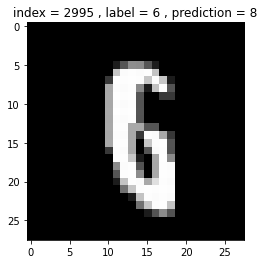

In [13]:
false_data_index = np.random.randint(len(index_label_prediction_list))

print('len of index_label_prediction_list => ', len(index_label_prediction_list), ', false_data_index => ', false_data_index)

mnist_index = index_label_prediction_list[false_data_index][0]
label = index_label_prediction_list[false_data_index][1]
prediction = index_label_prediction_list[false_data_index][2]

title_str = 'index = ' + str(mnist_index) + ' , label = ' + str(label) + ' , prediction = ' + str(prediction)

img = test_x_data[mnist_index].reshape(28,28)


plt.title(title_str)
plt.imshow(img, cmap='gray')
plt.show()

cond2d(...) 리턴 값 출력, 즉 필터에 의해 컨볼루션 연산된 이미지 출력 

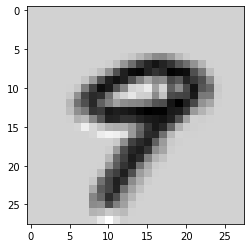

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# conv_ret_val image 확인

# conv_ret_val_list[0] => 1st conv layer 
# [9, :, :, 15] => 16번째 필터에 의해 컨볼루션 연산된 28 x 28 크기의 10번째 이미지 (즉, test_x_data[9] 데이터를 나타냄)

plt.imshow(conv_ret_val_list[0][9, :, :, 15], cmap='gray')  

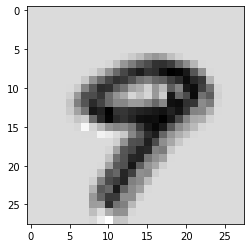

In [15]:
# conv_ret_val_list[0] => 1st conv layer 

# [9, :, :, 0] => 1번째 필터에 의해 컨볼루션 연산된 28 x 28 크기의 10번째 이미지 (즉, test_x_data[9] 데이터를 나타냄)

plt.imshow(conv_ret_val_list[0][9, :, :, 0], cmap='gray')  

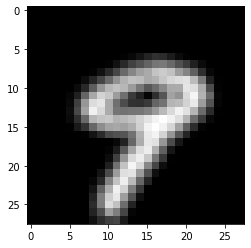

In [16]:
# conv_ret_val_list[0] => 1st conv layer 

# [9, :, :, 31] => 32번째 필터에 의해 컨볼루션 연산된 28 x 28 크기의 10번째 이미지 (즉, test_x_data[9] 데이터를 나타냄)

plt.imshow(conv_ret_val_list[0][9, :, :, 31], cmap='gray')  

max_pool(...) 리턴 값 출력, 즉 max pooling 적용된 이미지 출력

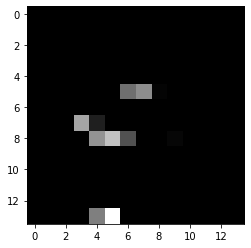

In [17]:
# pooling_ret_val_list[0] => 1st conv layer 

# [9, :, :, 15] => 16번째 필터에 의해 컨볼루션 연산된 후, max pooling 된 14 x 14 크기의 10번째 이미지 (즉, test_x_data[9] 데이터를 나타냄)

plt.imshow(pooling_ret_val_list[0][9, :, :, 15], cmap='gray')  

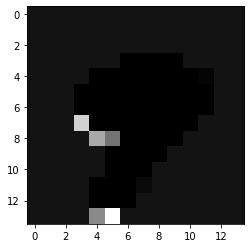

In [18]:
# pooling_ret_val_list[0] => 1st conv layer 

# [9, :, :, 0] => 1번째 필터에 의해 컨볼루션 연산된 후, max pooling 된 14 x 14 크기의 10번째 이미지 (즉, test_x_data[9] 데이터를 나타냄)

plt.imshow(pooling_ret_val_list[0][9, :, :, 0], cmap='gray')  

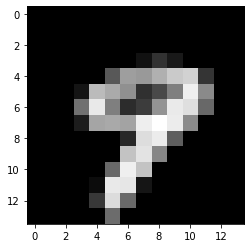

In [19]:
# pooling_ret_val_list[0] => 1st conv layer 

# [9, :, :, 31] => 32번째 필터에 의해 컨볼루션 연산된 후, max pooling 된 14 x 14 크기의 10번째 이미지 (즉, test_x_data[9] 데이터를 나타냄)

plt.imshow(pooling_ret_val_list[0][9, :, :, 31], cmap='gray')  